In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import math
%matplotlib inline
sns.set(context='paper', style='whitegrid',
        palette='tab10', font='sans-serif',
        font_scale=1.8, color_codes=True,
        rc={'figure.figsize':(16,8)})

In [6]:
left = pd.read_csv('outputs/lr_finder/lr_finder_20-04-2021_age_[0-70]_RMS_L_dp0.2.csv')
right = pd.read_csv('outputs/lr_finder/MSE/lr_finder_20-04-2021_age_[0-70]_RMS_L_dp0.2.csv')

-1
LR_finder_LR(10**-7.**-3.5)_RMS_0_70
/home/kpoloni/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.


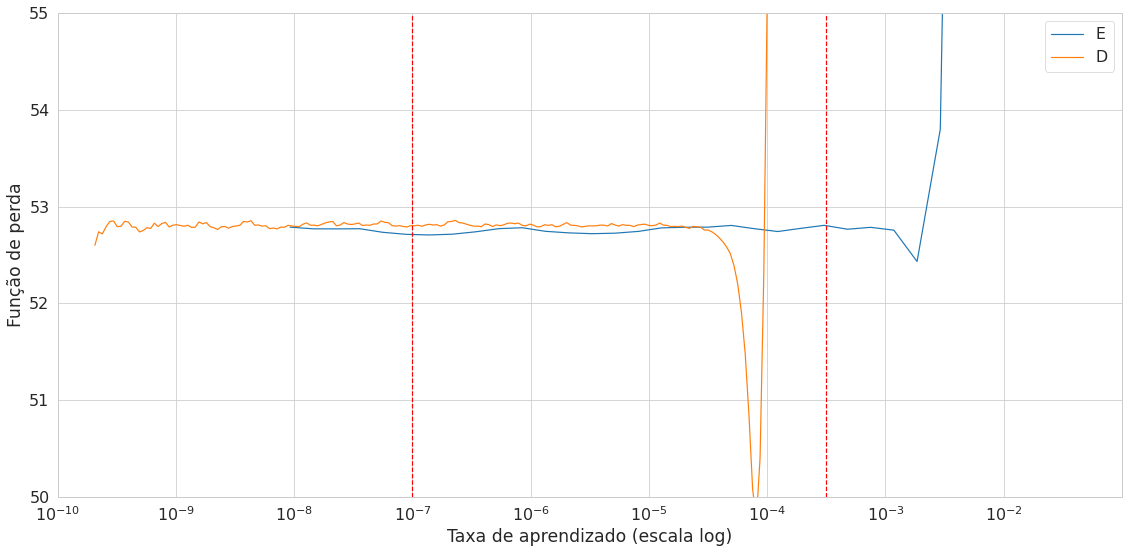

In [8]:

pt = True
# pt = False

min_, max_ = right['lr'].min(), right['lr'].max()
max_ = int(math.log10(max_)) + 1
opt = 'RMS'

lim = {'SGD': [-2.0,0.],
       'SGDm': [-2.9,-0.3],
       'Adam': [-4.3,-2.5],
       'RMS': [-7,-3.5]}

f, ax = plt.subplots()
if pt:
    sns.lineplot(x='lr', y='loss', data=left.iloc[10:], label='E')
    sns.lineplot(x='lr', y='loss', data=right.iloc[10:], label='D')
else:
    sns.lineplot(x='lr', y='loss', data=left.iloc[10:], label='L')
    sns.lineplot(x='lr', y='loss', data=right.iloc[10:], label='R')
print(max_)
ax.set_xscale("log", basex=10)
ax.set_xlim(10**-9.9999,10**max_)
# ax.set_ylim(2000, 5000)
ax.set_ylim(50, 55)
if pt:
    ax.set(xlabel='Taxa de aprendizado (escala log)', ylabel='Função de perda')
else:
    ax.set(xlabel='Learning rate (log scale)', ylabel='Loss')
ax.axvline(10**(lim[opt][0]), 0, 130, color='red', linestyle='--')
ax.axvline(10**(lim[opt][1]), 0, 130, color='red', linestyle='--')
# ax.axvline(10**(-3.2), 0, 130, color='red', linestyle='--')

plt.xticks([10**x for x in range(-10, max_)])
plt.tight_layout()
name = "LR_finder_LR(10**"+str(lim[opt][0])+".**"+str(lim[opt][1])+")_"+opt+"_0_70"
print(name)
# if pt:
#     f.savefig("outputs_exp/imgs/"+name+".png")
# else:
#     f.savefig("outputs_exp/imgs/"+name+"_us.png")


In [3]:
import numpy as np
from kneed import KneeLocator
left = pd.read_csv('outputs/lr_finder/lr_finder_22-02-2021_age_[70-100]_R.csv')
left['lr'] = left['lr'].apply(lambda x: np.log10(x))
kneedle = KneeLocator(left['lr'].iloc[1000:-20], left['loss'].iloc[1000:-20], S=1,curve='convex', direction='decreasing')
# print(kneedle.knee)
# kneedle.plot_knee_normalized()
kneedle.plot_knee()
# plt.plot(knee.x_difference, knee.y_difference)

FileNotFoundError: [Errno 2] File outputs/lr_finder/lr_finder_22-02-2021_age_[70-100]_R.csv does not exist: 'outputs/lr_finder/lr_finder_22-02-2021_age_[70-100]_R.csv'

In [ ]:
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances))

# calculating the optimal number of clusters
test = left.iloc[300:-20].reset_index(drop=True)
n = optimal_number_of_clusters(test['loss'].values)
test.iloc[n], test.iloc[-1]

In [ ]:
# sum_of_squares
left.shape

/home/kpoloni/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  


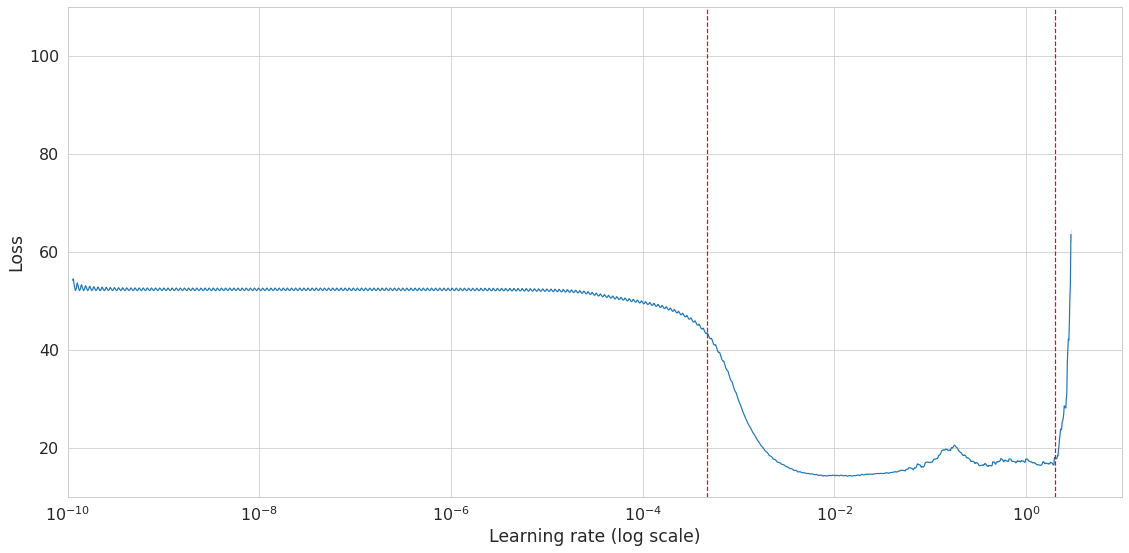

In [4]:
right = pd.read_csv('lr_loss_R.csv')

f, ax = plt.subplots()

sns.lineplot(x='lr', y='loss', data=right.iloc[10:])
ax.set_xscale("log", basex=10)
ax.set_xlim(10**-9.9999,10**1)
ax.set_ylim(10, 110)
ax.set(xlabel='Learning rate (log scale)', ylabel='Loss')
ax.axvline(10**(-3.33), 0, 130, color='red', linestyle='--')
ax.axvline(10**(0.3), 0, 130, color='red', linestyle='--')

plt.xticks([10**x for x in range(-10, 1, 2)])
plt.tight_layout()
f.savefig("LR_finder_R.png")